## <center>VAR Using Monte Carlo Simulation (Random Walk Function-Geometric Brownian motion(GBM)) and Stock Forecasting</center>

This notebook contains the expected loss margin ( daily, weekly, monthly, quarterly,  yearly) using Monte carlo simulation. This is calculated for Delta Coorporation, Sun tv, Idea, Alembic Pharma Limited, ITC, and United Spirits Limited selected after a fundamental analysis. The process uses the Historical Data extracted using the yfinance API. It also has <b>Support and Resistance Levels mapped out from the Caculated VaR</b> . It predicts the future prices of the stocks using the historical prices in conjuction with the Efficient Market Hypothesis.

In [183]:
#Installing the reqired libraries
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from scipy.stats import norm
import scipy.stats
import matplotlib.pyplot as plt

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [184]:
#Getting  Historical data from yfinance
data=yf.download(tickers='DELTACORP.NS', period='5y', interval='1mo')
data.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-01  149.199997  201.949997  147.000000  162.149994  162.149994   
2021-04-01  163.899994  170.500000  142.199997  150.199997  150.199997   
2021-05-01  147.199997  182.000000  145.399994  170.050003  170.050003   
2021-06-01  170.050003  195.899994  166.550003  183.550003  183.550003   
2021-06-11  185.550003  185.550003  181.000000  183.550003  183.550003   

                 Volume  
Date                     
2021-03-01  127343433.0  
2021-04-01   52353706.0  
2021-05-01   61692140.0  
2021-06-01   34138245.0  
2021-06-11    1229321.0

In [46]:
data.shape

(68, 6)

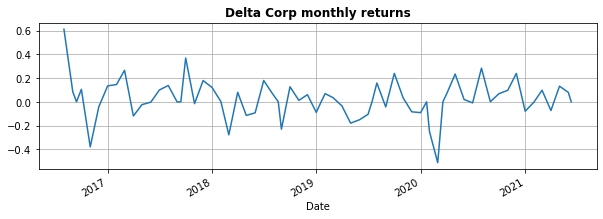

In [209]:
fig = plt.figure()
fig.set_size_inches(10,3)
data["Adj Close"].pct_change().plot()
plt.title("Delta Corp monthly returns", weight="bold");
plt.grid()

In [190]:
returns=data["Adj Close"].pct_change().dropna()
mean = returns.mean()
sigmaa = returns.std()
x=returns.quantile(0.01)
x

-0.42589041047661236

In [191]:
y=returns.quantile(0.05)
y

-0.24425472523032363

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A MONTH STARTING FROM 11/06/2021 FOR DELTA CORP

In [192]:
# defining the time frame, drift, and the volatility
days = 22 # monthly
dt = 1/float(days)  #time horizon(t/n)
sigma = sigmaa # volatility
mu = mean  # drift (average growth rate)

In [193]:
# function random_walk using the GBM Concept(Geometric Brownian Motion) for risk management. The breakdown for the change in price is such that it has a drift
#and a shock calculated using Historical data Mean and standard deviation for daily, monthly and quarterly returns on the selected stocks
def random_walk(startprice):
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

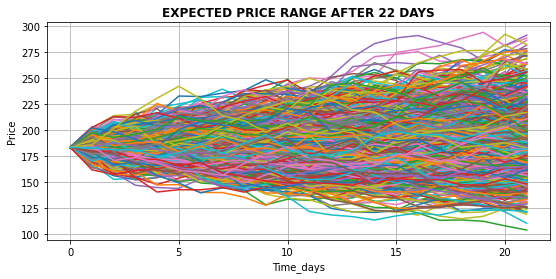

In [194]:
Run the random function for 1000 simulations
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(183.550003))             #Last Traded price for Delta Coorporation
# If I start from today onwards, the simulation is for next 22 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 22 DAYS", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean) calculated from monthly historical data

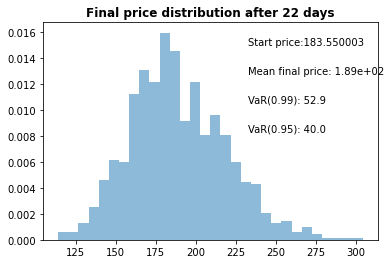

In [195]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(183.550003)[days-1]
q = np.percentile(simulations, 1)     #at 99% confidence
t = np.percentile(simulations,5)      #at 95% confidence
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:183.550003 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(183.550003 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(183.550003 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A WEEK STARTING FROM 11/06/2021 FOR DELTA CORP

In [211]:
#Extracting weekly data
data1=yf.download(tickers='DELTACORP.NS', period='5y', interval='1wk')
data1.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-05-17  149.500000  167.050003  148.750000  163.199997  163.199997   
2021-05-24  164.699997  182.000000  161.350006  171.699997  171.699997   
2021-05-31  172.000000  186.500000  166.550003  185.250000  185.250000   
2021-06-07  186.699997  195.899994  178.600006  183.550003  183.550003   
2021-06-11  185.550003  185.550003  181.000000  183.550003  183.550003   

                Volume  
Date                    
2021-05-17  15351024.0  
2021-05-24  27267883.0  
2021-05-31  19717078.0  
2021-06-07  16594860.0  
2021-06-11   1229321.0

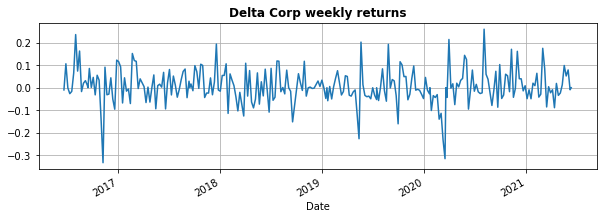

In [212]:
fig1 = plt.figure()
fig1.set_size_inches(10,3)
data1["Adj Close"].pct_change().plot()
plt.title("Delta Corp weekly returns", weight="bold");
plt.grid()

In [198]:
returns1=data1["Adj Close"].pct_change().dropna()
mean1 = returns1.mean()
sigma1 = returns1.std()
x1=returns1.quantile(0.05)
x1

-0.10257014785354443

In [199]:
y1=returns1.quantile(0.01)
y1

-0.22846117971730137

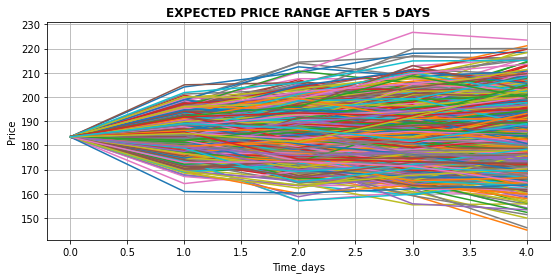

In [200]:
# Monte carlo using the random function with 1000 iterations
days = 5 # weekly
dt = 1/float(days)
sigma = sigma1
mu = mean1
# function random_walk to define the random path starting from (0,0)
def random_walk(startprice):
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(183.550003))   # Last Traded Price
# If I start from today onwards, the simulation is for next 5 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 5 DAYS", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean outcome)

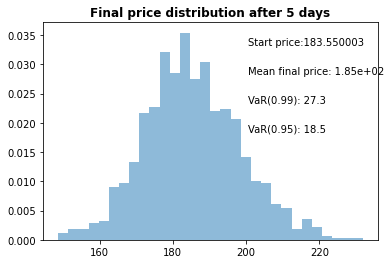

In [201]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(183.550003)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:183.550003 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(183.550003 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(183.550003 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A QUARTER STARTING FROM 11/06/2021 FOR DELTA CORP

In [259]:
#Extracting weekly data
data12=yf.download(tickers='DELTACORP.NS', period='5y', interval='3mo')
data12.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-09-01  109.099998  137.949997  100.000000  129.600006  129.600006   
2020-12-01  129.800003  174.350006  129.250000  147.699997  147.699997   
2021-03-01  149.199997  201.949997  142.199997  170.050003  170.050003   
2021-06-01  170.050003  195.899994  166.550003  183.550003  183.550003   
2021-06-11  185.550003  185.550003  181.000000  183.550003  183.550003   

                 Volume  
Date                     
2020-09-01  124562104.0  
2020-12-01  166725508.0  
2021-03-01  241389279.0  
2021-06-01   34138245.0  
2021-06-11    1229321.0

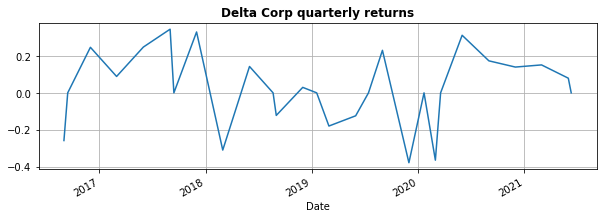

In [260]:
fig12 = plt.figure()
fig12.set_size_inches(10,3)
data12["Adj Close"].pct_change().plot()
plt.title("Delta Corp quarterly returns", weight="bold");
plt.grid()

In [261]:
returns12=data12["Adj Close"].pct_change().dropna()
mean12 = returns12.mean()
sigma12 = returns12.std()
x12=returns12.quantile(0.05)
x12

-0.3454859073038167

In [205]:
y12=returns12.quantile(0.01)
y12

-0.37468918392861256

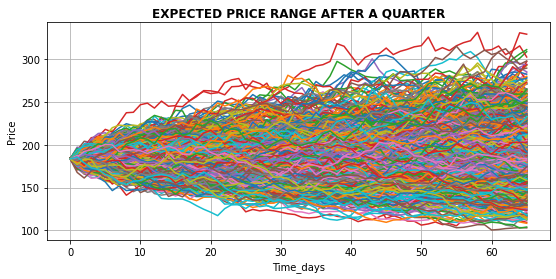

In [262]:
# Monte carlo using the random function with 10000 iterations
days = 66 # weekly
dt = 1/float(days)
sigma = sigma12
mu = mean12
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(183.550003))   # Last Traded Price
# If I start from today onwards, the simulation is for next 66 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A QUARTER", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean=~0.0075) calculated from quaterly historical data

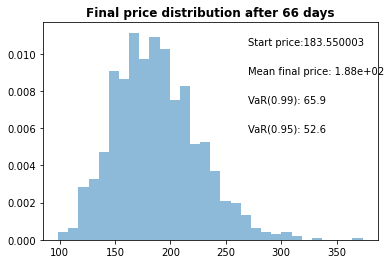

In [264]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(183.550003)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:183.550003 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(183.550003 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(183.550003 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A YEAR STARTING FROM 11/06/2021 FOR DELTA CORP

In [220]:
#Extracting data
data13=yf.download(tickers='DELTACORP.NS', period='1mo', interval='1d')
data13.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-07  186.699997  195.899994  183.449997  188.850006  188.850006   
2021-06-08  189.899994  189.899994  181.050003  184.850006  184.850006   
2021-06-09  184.800003  188.500000  178.600006  182.100006  182.100006   
2021-06-10  182.800003  184.750000  181.600006  183.850006  183.850006   
2021-06-11  185.550003  185.550003  181.000000  183.550003  183.550003   

             Volume  
Date                 
2021-06-07  7824563  
2021-06-08  2979481  
2021-06-09  3171899  
2021-06-10  1386646  
2021-06-11  1232271

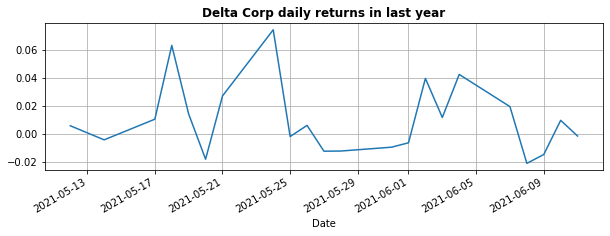

In [221]:
fig13 = plt.figure()
fig13.set_size_inches(10,3)
data13["Adj Close"].pct_change().plot()
plt.title("Delta Corp daily returns in last year", weight="bold");
plt.grid()

In [222]:
returns13=data13["Adj Close"].pct_change().dropna()
mean13 = returns13.mean()
sigma13 = returns13.std()
x13=returns13.quantile(0.05)
x13
#With 95% confidence, worst daily loss won't exceed 1.8%

-0.01805933284334337

In [223]:
y13=returns13.quantile(0.01)
y13
#With 99% confidence, worst daily loss won't exceed 2.05%

-0.020560490083051046

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A MONTH STARTING FROM 11/06/2021 FOR SUN TV

In [265]:
#Getting  Historical data from yfinance
data2=yf.download(tickers='SUNTV.NS', period='5y', interval='1mo')
data2.tail()

[*********************100%***********************]  1 of 1 completed


Open        High    Low       Close   Adj Close      Volume
Date                                                                         
2021-03-01  498.700012  530.700012  450.0  470.299988  470.299988  45648139.0
2021-04-01  474.500000  549.950012  450.0  543.349976  543.349976  53432642.0
2021-05-01  554.000000  560.000000  487.0  541.650024  541.650024  73241910.0
2021-06-01  543.000000  545.000000  516.0  531.049988  531.049988  15043533.0
2021-06-11  536.000000  541.849976  526.0  531.049988  531.049988   1762724.0

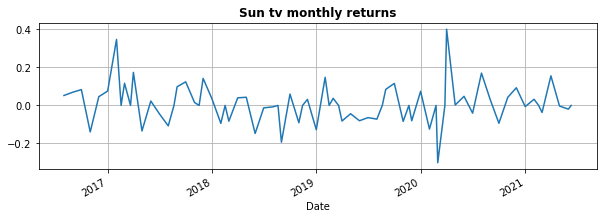

In [266]:
fig2 = plt.figure()
fig2.set_size_inches(10,3)
data2["Adj Close"].pct_change().plot()
plt.title("Sun tv monthly returns", weight="bold");
plt.grid()

In [267]:
returns2=data2["Adj Close"].pct_change().dropna()
mean2 = returns2.mean()
sigma2 = returns2.std()
x2=returns2.quantile(0.05)
x2

-0.1357704857944263

In [75]:
y2=returns2.quantile(0.01)
y2

-0.221259884150509

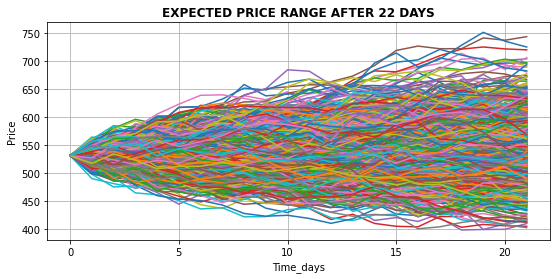

In [268]:
days = 22 # monthly
dt = 1/float(days)
sigma = sigma2 
mu = mean2  
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(531.049988))
# If I start from today onwards, the simulation is for next 22 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 22 DAYS", weight="bold");
# The exceptation is almost same on both side but slightly more towards the profit side owing to the positive drift(mean=~0.0022) calculated from monthly historical data

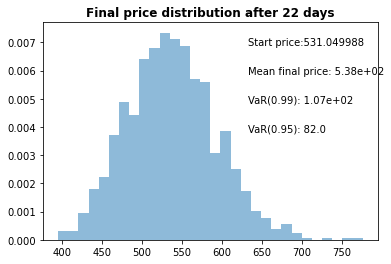

In [272]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(531.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:531.049988 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(531.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(531.049988 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A WEEK STARTING FROM 10/06/2021 FOR SUN TV

In [227]:
data3=yf.download(tickers='SUNTV.NS', period='5y', interval='1wk')
data3.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-05-17  525.000000  539.950012  516.000000  524.700012  524.700012   
2021-05-24  525.000000  560.000000  514.200012  546.000000  546.000000   
2021-05-31  545.400024  548.049988  520.049988  521.750000  521.750000   
2021-06-07  527.750000  541.849976  516.000000  531.049988  531.049988   
2021-06-11  536.000000  541.849976  526.000000  531.049988  531.049988   

                Volume  
Date                    
2021-05-17  11123939.0  
2021-05-24  21199151.0  
2021-05-31   7979978.0  
2021-06-07   8422850.0  
2021-06-11   1762724.0

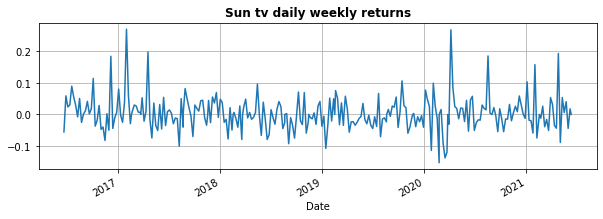

In [228]:
fig3 = plt.figure()
fig3.set_size_inches(10,3)
data3["Adj Close"].pct_change().plot()
plt.title("Sun tv daily weekly returns", weight="bold");
plt.grid()

In [80]:
returns3=data3["Adj Close"].pct_change().dropna()
mean3 = returns3.mean()
sigma3 = returns3.std()
x3=returns3.quantile(0.05)
x3

-0.07495157952434559

In [81]:
y3=returns3.quantile(0.01)
y3

-0.11576208163905466

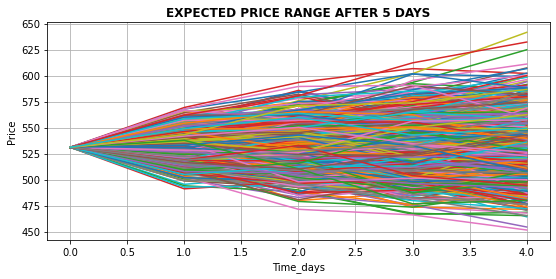

In [82]:
days = 5 # weekly
dt = 1/float(days)
sigma = sigma3
mu = mean3 
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(531.049988))   # last traded price
# If I start from today onwards, the simulation is for next 5 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 5 DAYS", weight="bold");
# The exceptation is more towards the loss side owing to the negative drift(mean=-0.002) calculated from weekly historical data

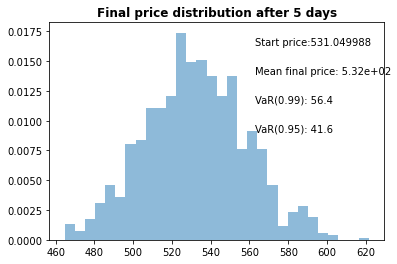

In [83]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(531.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:531.049988 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(531.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(531.049988 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

   ### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A QUARTER STARTING FROM 10/06/2021 FOR SUN TV

In [84]:
data20=yf.download(tickers='SUNTV.NS', period='5y', interval='3mo')
data20.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-01  442.100006  570.400024  429.200012  493.200012  488.423737   
2021-02-17         NaN         NaN         NaN         NaN         NaN   
2021-03-01  498.700012  560.000000  450.000000  541.650024  541.650024   
2021-06-01  543.000000  545.000000  516.000000  531.049988  531.049988   
2021-06-11  536.000000  541.849976  526.000000  531.049988  531.049988   

                 Volume  
Date                     
2020-12-01  238104757.0  
2021-02-17          NaN  
2021-03-01  172322691.0  
2021-06-01   15043533.0  
2021-06-11    1762724.0

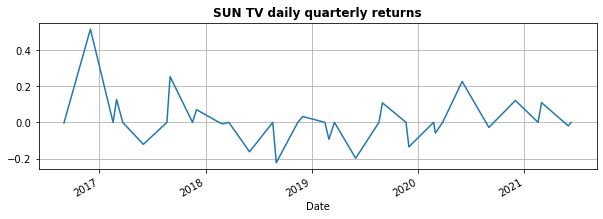

In [229]:
fig20 = plt.figure()
fig20.set_size_inches(10,3)
data20["Adj Close"].pct_change().plot()
plt.title("SUN TV daily quarterly returns", weight="bold");
plt.grid()

In [86]:
returns20=data20["Adj Close"].pct_change().dropna()
mean20 = returns20.mean()
sigma20 = returns20.std()
x20=returns20.quantile(0.05)
x20

-0.17153776304157062

In [87]:
y20=returns20.quantile(0.01)
y20

-0.21438830040339493

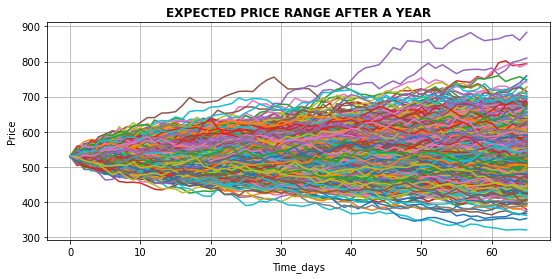

In [90]:
# Monte carlo using the random function with 10000 iterations
days = 66 # weekly
dt = 1/float(days)
sigma = sigma20
mu = mean20
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(531.049988))   # Last Traded Price
# If I start from today onwards, the simulation is for next 252 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A YEAR", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean=~0.0075) calculated from yearly historical data

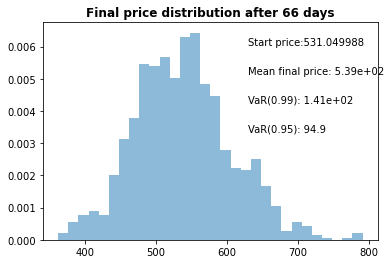

In [91]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(531.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:531.049988 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(531.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(531.049988 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A MONTH STARTING FROM 11/06/2021 FOR ITC

In [231]:
#Getting  Historical data from yfinance
data4=yf.download(tickers='ITC.NS', period='5y', interval='1mo')
data4.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  220.000000  220.600006  200.550003  202.600006  197.117889   
2021-05-01  201.199997  217.899994  199.100006  216.600006  210.739059   
2021-06-01  218.000000  219.399994  207.500000  207.899994  202.274460   
2021-06-10         NaN         NaN         NaN         NaN         NaN   
2021-06-11  210.300003  210.449997  207.750000  207.899994  207.899994   

                 Volume  
Date                     
2021-04-01  370956773.0  
2021-05-01  549122786.0  
2021-06-01  341920086.0  
2021-06-10          NaN  
2021-06-11   21365178.0

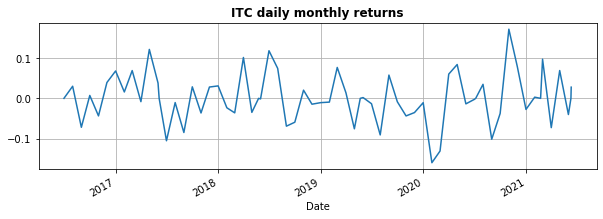

In [232]:
fig4 = plt.figure()
fig4.set_size_inches(10,3)
data4["Adj Close"].pct_change().plot()
plt.title("ITC daily monthly returns", weight="bold");
plt.grid()

In [233]:
returns4=data4["Adj Close"].pct_change().dropna()
mean4 = returns4.mean()
sigma4 = returns4.std()
x4=returns4.quantile(0.05)
x4

-0.09831986773025228

In [234]:
y4=returns4.quantile(0.01)
y4

-0.14072827640516436

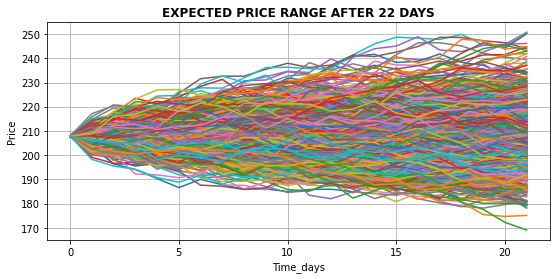

In [97]:
days = 22 # monthly
dt = 1/float(days)
sigma = sigma4 
mu = mean4  
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(207.899994))   # last traded price
# If I start from today onwards, the simulation is for next 22 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 22 DAYS", weight="bold");
# The exceptation is almost same on both side but slightly more towards the profit side owing to the positive drift(mean=~0.0016) calculated from monthly historical data

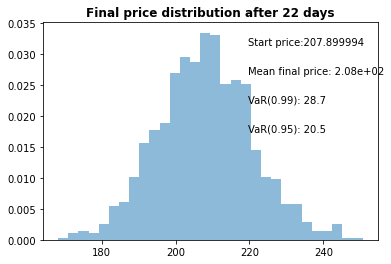

In [98]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(207.899994)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:207.899994 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(207.899994 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(207.899994 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A WEEK STARTING FROM 11/06/2021 FOR ITC

In [236]:
data5=yf.download(tickers='ITC.NS', period='5y', interval='1wk')
data5.tail()

[*********************100%***********************]  1 of 1 completed


Open        High     Low       Close   Adj Close  \
Date                                                                 
2021-05-24  209.500000  214.149994  207.75  212.899994  207.139160   
2021-05-31  215.000000  219.399994  208.00  208.750000  203.101471   
2021-06-07  210.399994  214.750000  207.50  207.899994  202.274460   
2021-06-10         NaN         NaN     NaN         NaN         NaN   
2021-06-11  210.300003  210.449997  207.75  207.899994  207.899994   

                 Volume  
Date                     
2021-05-24  144928582.0  
2021-05-31  285233174.0  
2021-06-07  129726443.0  
2021-06-10          NaN  
2021-06-11   21365178.0

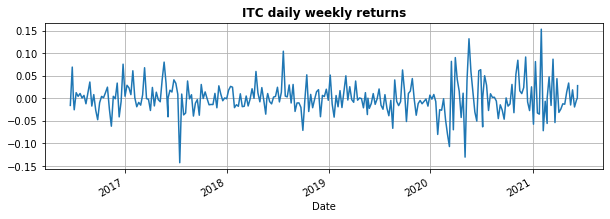

In [237]:
fig5 = plt.figure()
fig5.set_size_inches(10,3)
data5["Adj Close"].pct_change().plot()
plt.title("ITC daily weekly returns", weight="bold");
plt.grid()

In [235]:
returns5=data5["Adj Close"].pct_change().dropna()
mean5 = returns5.mean()
sigma5 = returns5.std()
x5=returns5.quantile(0.05)
x5

-0.053226403651719344

In [104]:
y5=returns5.quantile(0.01)
y5

-0.08928150588672053

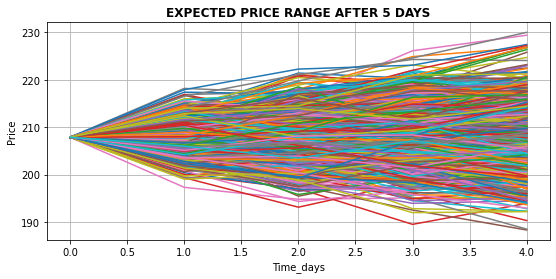

In [105]:
days = 5 # weekly
dt = 1/float(days)
sigma = sigma5
mu = mean5
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(207.899994))
# If I start from today onwards, the simulation is for next 5 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 5 DAYS", weight="bold");

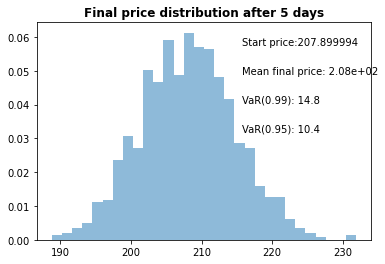

In [106]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(207.899994)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:207.899994 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(207.899994 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(207.899994 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A QUARTER STARTING FROM 11/06/2021 FOR ITC

In [238]:
data21=yf.download(tickers='ITC.NS', period='5y', interval='3mo')
data21.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-22         NaN         NaN         NaN         NaN         NaN   
2021-03-01  205.449997  228.100006  199.100006  216.600006  210.739059   
2021-06-01  218.000000  219.399994  207.500000  207.899994  202.274460   
2021-06-10         NaN         NaN         NaN         NaN         NaN   
2021-06-11  210.300003  210.449997  207.750000  207.899994  207.899994   

                  Volume  
Date                      
2021-02-22           NaN  
2021-03-01  1.761849e+09  
2021-06-01  3.419201e+08  
2021-06-10           NaN  
2021-06-11  2.136518e+07

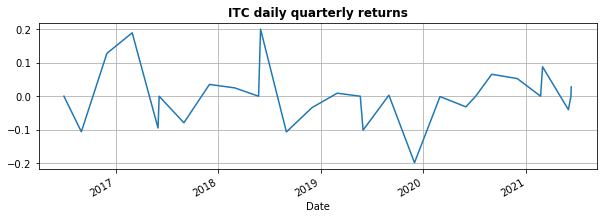

In [239]:
fig21 = plt.figure()
fig21.set_size_inches(10,3)
data21["Adj Close"].pct_change().plot()
plt.title("ITC daily quarterly returns", weight="bold");
plt.grid()

In [240]:
returns21=data21["Adj Close"].pct_change().dropna()
mean21 = returns21.mean()
sigma21 = returns21.std()
x21=returns21.quantile(0.05)
x21

-0.1062758923256315

In [241]:
y21=returns21.quantile(0.01)
y21

-0.17346923021458704

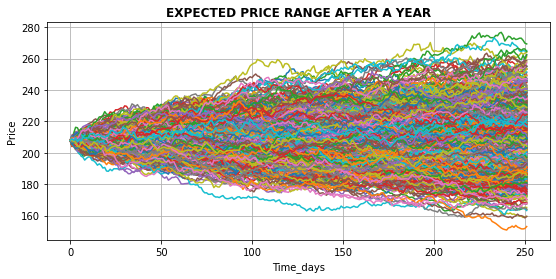

In [112]:
# Monte carlo using the random function with 10000 iterations
days = 252 # weekly
dt = 1/float(days)
sigma = sigma21
mu = mean21
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(207.899994))   # Last Traded Price
# If I start from today onwards, the simulation is for next 252 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A YEAR", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean=~0.0075) calculated from yearly historical data

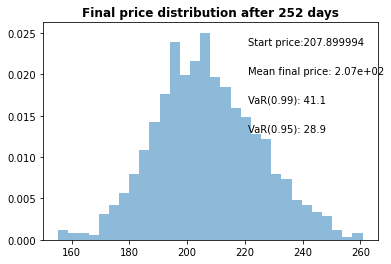

In [113]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(207.899994)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:207.899994 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(207.899994 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(207.899994 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A MONTH STARTING FROM 11/06/2021 FOR UNITED SPIRITS

In [243]:
#Getting  Historical data from yfinance
data6=yf.download(tickers='MCDOWELL-N.NS', period='5y', interval='1mo')
data6.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-03-01  537.900024  573.650024  517.650024  556.349976  556.349976   
2021-04-01  559.000000  561.900024  507.500000  519.549988  519.549988   
2021-05-01  517.000000  617.650024  512.549988  612.450012  612.450012   
2021-06-01  616.000000  656.000000  609.750000  646.049988  646.049988   
2021-06-11  647.599976  656.000000  643.299988  646.049988  646.049988   

                Volume  
Date                    
2021-03-01  48146973.0  
2021-04-01  29513967.0  
2021-05-01  50342868.0  
2021-06-01  23269668.0  
2021-06-11   2125075.0

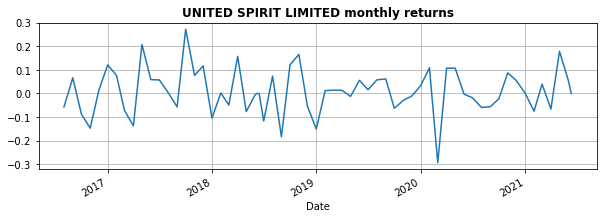

In [244]:
fig6 = plt.figure()
fig6.set_size_inches(10,3)
data6["Adj Close"].pct_change().plot()
plt.title("UNITED SPIRIT LIMITED monthly returns", weight="bold");
plt.grid()

In [116]:
returns6=data6["Adj Close"].pct_change().dropna()
mean6 = returns6.mean()
sigma6 = returns6.std()
x6=returns6.quantile(0.05)
x6

-0.14694650548420335

In [117]:
y6=returns6.quantile(0.01)
y6

-0.22686354519710528

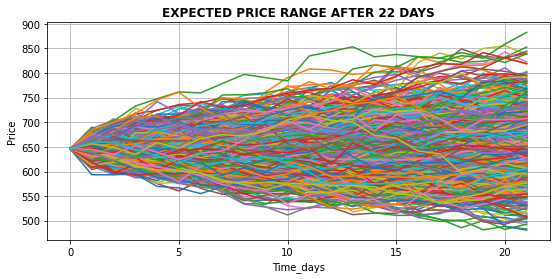

In [118]:
days = 22 # monthly
dt = 1/float(days)
sigma = sigma6 
mu = mean6 
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(646.049988))
# If I start from today onwards, the simulation is for next 22 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 22 DAYS", weight="bold");
# The exceptation is almost same on both side but slightly more towards the profit side owing to the positive drift(mean=~0.006) calculated from monthly historical data

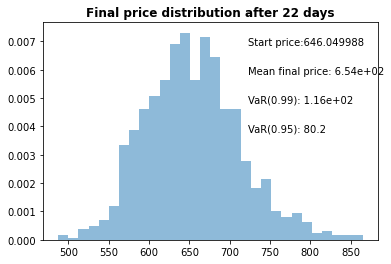

In [119]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(646.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:646.049988 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(646.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(646.049988 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A WEEK STARTING FROM 10/06/2021 FOR UNITED SPIRITS

In [121]:
data7=yf.download(tickers='MCDOWELL-N.NS', period='5y', interval='1wk')
data7.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-05-17  571.000000  583.200012  563.000000  572.250000  572.250000   
2021-05-24  589.650024  613.450012  571.200012  611.250000  611.250000   
2021-05-31  608.000000  644.799988  607.099976  629.349976  629.349976   
2021-06-07  635.000000  656.000000  621.200012  646.049988  646.049988   
2021-06-11  647.599976  656.000000  643.299988  646.049988  646.049988   

                Volume  
Date                    
2021-05-17   9855004.0  
2021-05-24  22656748.0  
2021-05-31  13843610.0  
2021-06-07  11593150.0  
2021-06-11   2125075.0

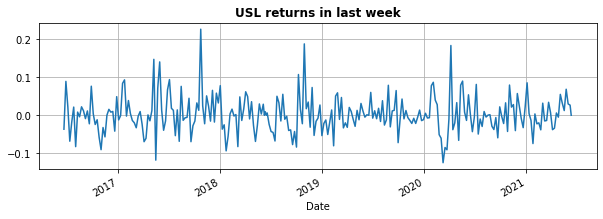

In [245]:
fig7 = plt.figure()
fig7.set_size_inches(10,3)
data7["Adj Close"].pct_change().plot()
plt.title("USL returns in last week", weight="bold");
plt.grid()

In [123]:
returns7=data7["Adj Close"].pct_change().dropna()
mean7 = returns7.mean()
sigma7 = returns7.std()
x7=returns7.quantile(0.05)
x7

-0.06927166490355156

In [124]:
y7=returns7.quantile(0.01)
y7

-0.0914901752363681

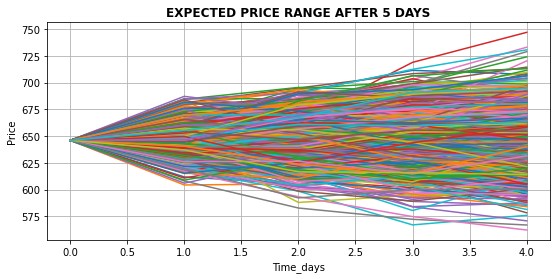

In [125]:
days = 5 # weekly
dt = 1/float(days)
sigma = sigma7
mu = mean7 
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(646.049988))
# If I start from today onwards, the simulation is for next 5 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 5 DAYS", weight="bold");
# The exceptation is more towards the profit owing to the positive drift(mean=0.005) calculated from weekly historical data

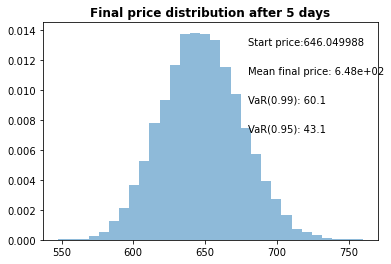

In [126]:
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(646.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:646.049988 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(646.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(646.049988 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A QUARTER STARTING FROM 11/06/2021 FOR UNITED SPIRITS

In [246]:
data22=yf.download(tickers='MCDOWELL-N.NS', period='5y', interval='3mo')
data22.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-09-01  545.000000  588.849976  494.000000  548.400024  548.400024   
2020-12-01  554.000000  661.650024  531.000000  535.099976  535.099976   
2021-03-01  537.900024  617.650024  507.500000  612.450012  612.450012   
2021-06-01  616.000000  656.000000  609.750000  646.049988  646.049988   
2021-06-11  647.599976  656.000000  643.299988  646.049988  646.049988   

                 Volume  
Date                     
2020-09-01  136875717.0  
2020-12-01  163720539.0  
2021-03-01  128003808.0  
2021-06-01   23269668.0  
2021-06-11    2125075.0

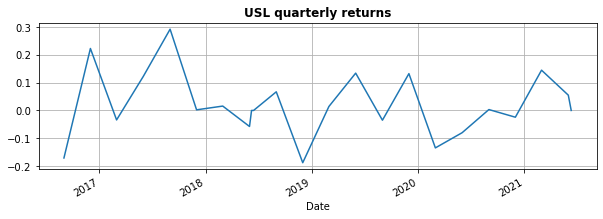

In [247]:
fig22 = plt.figure()
fig22.set_size_inches(10,3)
data22["Adj Close"].pct_change().plot()
plt.title("USL quarterly returns", weight="bold");
plt.grid()

In [129]:
returns22=data22["Adj Close"].pct_change().dropna()
mean22 = returns22.mean()
sigma22 = returns22.std()
x22=returns22.quantile(0.05)
x22

-0.16697817349410418

In [130]:
y22=returns22.quantile(0.01)
y22

-0.18386841579113863

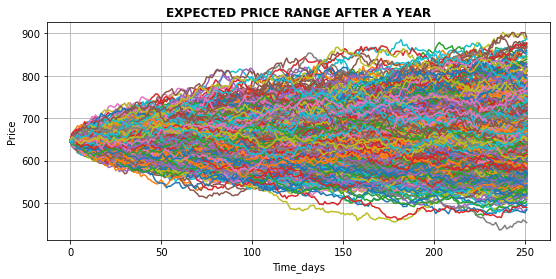

In [131]:
# Monte carlo using the random function with 10000 iterations
days = 252 # weekly
dt = 1/float(days)
sigma = sigma22
mu = mean22
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(646.049988))   # Last Traded Price
# If I start from today onwards, the simulation is for next 252 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A YEAR", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean=~0.0075) calculated from yearly historical data

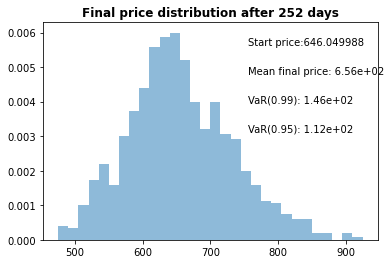

In [132]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(646.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:646.049988 ")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(646.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(646.049988 - t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A MONTH STARTING FROM 11/06/2021 FOR ALEMBIC PHARMACEUTICALS

In [133]:
#Getting  Historical data from yfinance
data8=yf.download(tickers='APLLTD.NS', period='5y', interval='1mo')
data8.tail()

[*********************100%***********************]  1 of 1 completed


Open         High         Low        Close    Adj Close  \
Date                                                                        
2021-03-01  910.099976   969.950012  864.299988   964.950012   964.950012   
2021-04-01  964.900024  1038.000000  945.500000   985.700012   985.700012   
2021-05-01  988.000000  1035.000000  924.000000   951.099976   951.099976   
2021-06-01  955.000000  1025.949951  931.099976  1006.049988  1006.049988   
2021-06-11  980.099976  1025.949951  980.099976  1006.049988  1006.049988   

               Volume  
Date                   
2021-03-01  7288730.0  
2021-04-01  7497557.0  
2021-05-01  9951976.0  
2021-06-01  4719506.0  
2021-06-11  1672345.0

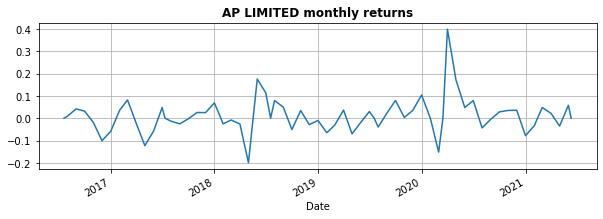

In [248]:
fig8 = plt.figure()
fig8.set_size_inches(10,3)
data8["Adj Close"].pct_change().plot()
plt.title("AP LIMITED monthly returns", weight="bold");
plt.grid()

In [135]:
returns8=data8["Adj Close"].pct_change().dropna()
mean8 = returns8.mean()
sigma8 = returns8.std()
x8=returns8.quantile(0.05)
x8

-0.09641804294197061

In [136]:
y8=returns8.quantile(0.01)
y8

-0.16905146611651567

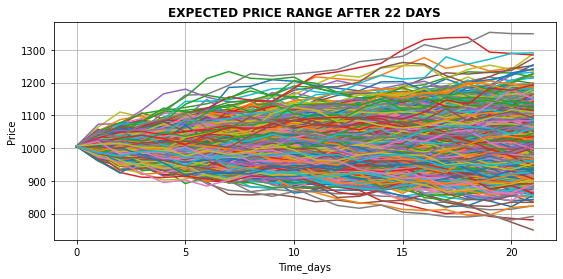

In [137]:
days = 22 # monthly
dt = 1/float(days)
sigma = sigma8 
mu = mean8  
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(1006.049988))
# If I start from today onwards, the simulation is for next 22 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 22 DAYS", weight="bold");
# The exceptation is almost same on both side but slightly more towards the profit side owing to the positive drift(mean) calculated from monthly historical data

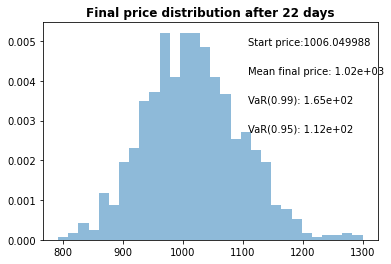

In [138]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(1006.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:1006.049988")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(1006.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(1006.049988- t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A WEEK STARTING FROM 11/06/2021 FOR AP LIMITED

In [140]:
data9=yf.download(tickers='APLLTD.NS', period='5y', interval='1wk')
data9.tail()

[*********************100%***********************]  1 of 1 completed


Open         High         Low        Close    Adj Close  \
Date                                                                        
2021-05-17  942.000000   975.000000  924.000000   956.450012   956.450012   
2021-05-24  960.000000   969.000000  941.000000   941.900024   941.900024   
2021-05-31  943.450012   967.000000  931.099976   949.500000   949.500000   
2021-06-07  952.700012  1025.949951  942.000000  1006.049988  1006.049988   
2021-06-11  980.099976  1025.949951  980.099976  1006.049988  1006.049988   

               Volume  
Date                   
2021-05-17  1879876.0  
2021-05-24  1260462.0  
2021-05-31  1096490.0  
2021-06-07  3778227.0  
2021-06-11  1672345.0

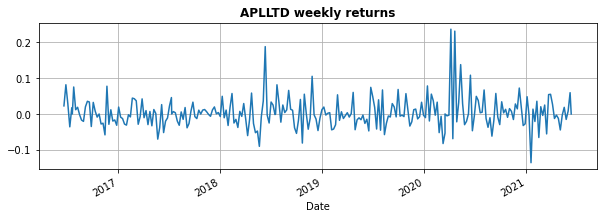

In [249]:
fig9 = plt.figure()
fig9.set_size_inches(10,3)
data9["Adj Close"].pct_change().plot()
plt.title("APLLTD weekly returns", weight="bold");
plt.grid()

In [142]:
returns9=data9["Adj Close"].pct_change().dropna()
mean9 = returns9.mean()
sigma9 = returns9.std()
x9=returns9.quantile(0.05)
x9

-0.05313028675484316

In [143]:
y9=returns9.quantile(0.01)
y9

-0.08180859034402273

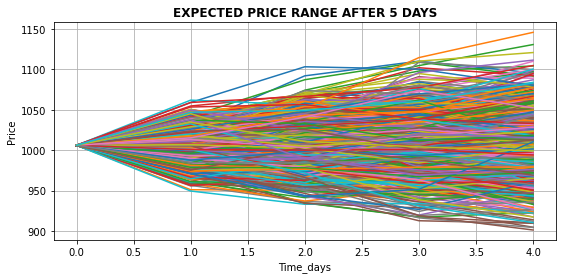

In [144]:
days = 5 # weekly
dt = 1/float(days)
sigma = sigma9
mu = mean9 
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(1006.049988))
# If I start from today onwards, the simulation is for next 5 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 5 DAYS", weight="bold");
# The exceptation is more towards the profit owing to the positive drift(mean=0.005) calculated from weekly historical data

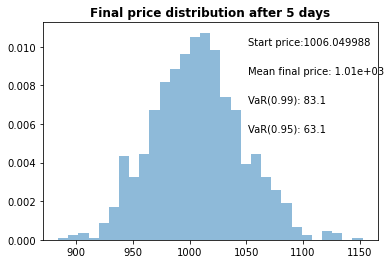

In [145]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(1006.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:1006.049988")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(1006.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(1006.049988- t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A QUARTER STARTING FROM 11/06/2021 FOR APLLTD

In [146]:
data23=yf.download(tickers='APLLTD.NS', period='5y', interval='3mo')
data23.tail()

[*********************100%***********************]  1 of 1 completed


Open         High         Low        Close    Adj Close  \
Date                                                                        
2020-09-01  940.000000  1032.000000  865.849976   998.099976   998.099976   
2020-12-01  998.000000  1145.000000  870.000000   920.750000   920.750000   
2021-03-01  910.099976  1038.000000  864.299988   951.099976   951.099976   
2021-06-01  955.000000  1025.949951  931.099976  1006.049988  1006.049988   
2021-06-11  980.099976  1025.949951  980.099976  1006.049988  1006.049988   

                Volume  
Date                    
2020-09-01  22806266.0  
2020-12-01  23063399.0  
2021-03-01  24738263.0  
2021-06-01   4719506.0  
2021-06-11   1672345.0

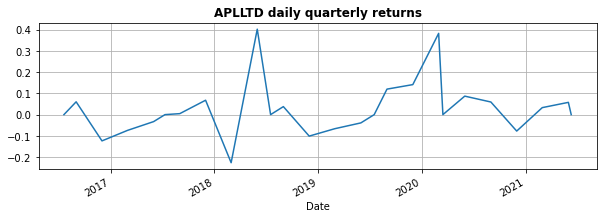

In [250]:
fig23 = plt.figure()
fig23.set_size_inches(10,3)
data23["Adj Close"].pct_change().plot()
plt.title("APLLTD daily quarterly returns", weight="bold");
plt.grid()

In [148]:
returns23=data23["Adj Close"].pct_change().dropna()
mean23 = returns23.mean()
sigma23 = returns23.std()
x23=returns23.quantile(0.05)
x23

-0.11810664297133502

In [149]:
y23=returns23.quantile(0.01)
y23

-0.20087940883997257

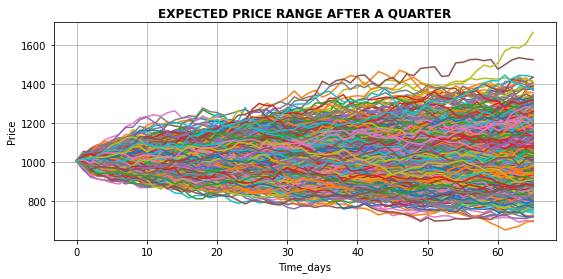

In [152]:
# Monte carlo using the random function with 1000 iterations
days = 66 # weekly
dt = 1/float(days)
sigma = sigma23
mu = mean23
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(1006.04998))   # Last Traded Price
# If I start from today onwards, the simulation is for next 252 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A QUARTER", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift(mean=~0.0075) calculated from yearly historical data

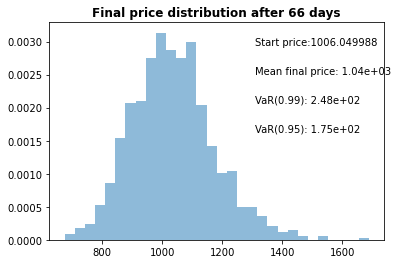

In [153]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(1006.049988)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:1006.049988")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(1006.049988 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(1006.049988- t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A MONTH STARTING FROM 11/06/2021 FOR IDEA

In [251]:
#Getting  Historical data from yfinance
data10=yf.download(tickers='IDEA.NS', period='5y', interval='1mo')
data10.tail()

[*********************100%***********************]  1 of 1 completed


Open   High   Low  Close  Adj Close        Volume
Date                                                         
2021-03-01  11.4  11.65  8.80   9.25       9.25  4.562792e+09
2021-04-01   9.3  10.15  8.30   8.35       8.35  2.571583e+09
2021-05-01   8.3   9.15  8.05   8.65       8.65  2.359257e+09
2021-06-01   8.7  10.30  8.45   9.85       9.85  2.134558e+09
2021-06-11  10.0  10.15  9.75   9.85       9.85  1.613100e+08

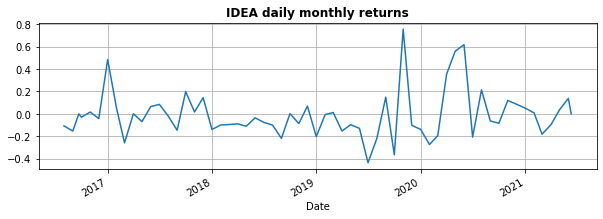

In [252]:
fig10 = plt.figure()
fig10.set_size_inches(10,3)
data10["Adj Close"].pct_change().plot()
plt.title("IDEA daily monthly returns", weight="bold");
plt.grid()

In [157]:
returns10=data10["Adj Close"].pct_change().dropna()
mean10 = returns10.mean()
sigma10 = returns10.std()
x10=returns10.quantile(0.05)
x10

-0.2589555388231717

In [158]:
y10=returns10.quantile(0.01)
y10

-0.3939977844850804

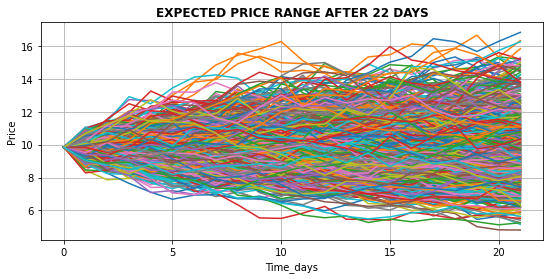

In [159]:
days = 22 # monthly
dt = 1/float(days)
sigma = sigma10 
mu = mean10 
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(9.85))
# If I start from today onwards, the simulation is for next 22 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 22 DAYS", weight="bold");
# The exceptation is almost same on both side but slightly more towards the profit side owing to the positive drift(mean) calculated from monthly historical data

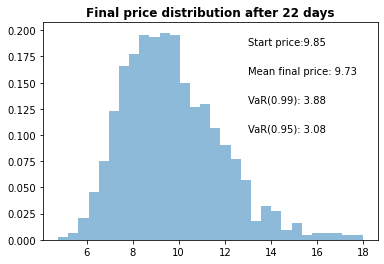

In [160]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(9.85)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:9.85")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(9.85 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(9.85- t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A WEEK STARTING FROM 11/06/2021 FOR IDEA

In [162]:
data11=yf.download(tickers='IDEA.NS', period='5y', interval='1wk')
data11.tail()

[*********************100%***********************]  1 of 1 completed


Open   High   Low  Close  Adj Close        Volume
Date                                                          
2021-05-17   8.70   8.75  8.35   8.55       8.55  4.375569e+08
2021-05-24   8.55   9.10  8.40   8.70       8.70  5.545157e+08
2021-05-31   8.75   9.85  8.45   9.75       9.75  1.122134e+09
2021-06-07  10.00  10.30  9.50   9.85       9.85  1.080863e+09
2021-06-11  10.00  10.15  9.75   9.85       9.85  1.613100e+08

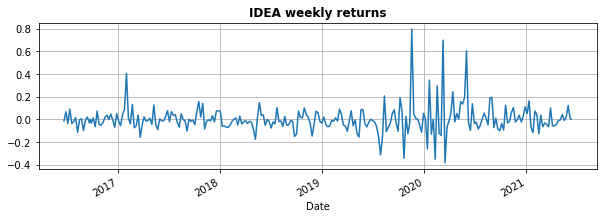

In [254]:
fig11 = plt.figure()
fig11.set_size_inches(10,3)
data11["Adj Close"].pct_change().plot()
plt.title("IDEA weekly returns", weight="bold");
plt.grid()

In [255]:
returns11=data11["Adj Close"].pct_change().dropna()
mean11 = returns11.mean()
sigma11 = returns11.std()
x11=returns11.quantile(0.05)
x11

-0.1321214070701554

In [165]:
y11=returns11.quantile(0.01)
y11

-0.3253057649690102

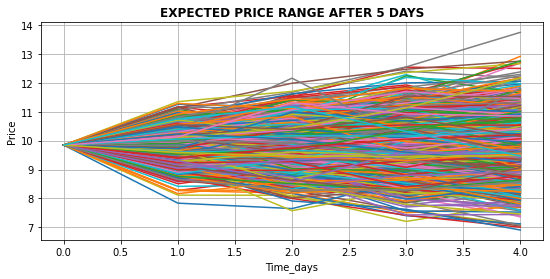

In [166]:
days = 5 # weekly
dt = 1/float(days)
sigma = sigma11
mu = mean11 
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(9.85))
# If I start from today onwards, the simulation is for next 5 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER 5 DAYS", weight="bold");
# The exceptation is more towards the profit owing to the positive drift(mean=0.005) calculated from weekly historical data

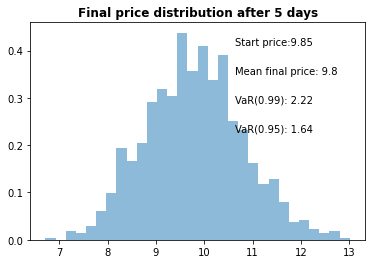

In [167]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(9.85)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:9.85")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(9.85 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(9.85- t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

### MONTE CARLO SIMULATION TO CALCULATE THE EXPECTED LOSS FOR A QUARTERLY STARTING FROM 11/06/2021 FOR IDEA

In [256]:
data24=yf.download(tickers='IDEA.NS', period='5y', interval='3mo')
data24.tail()

[*********************100%***********************]  1 of 1 completed


Open   High   Low  Close  Adj Close        Volume
Date                                                         
2020-09-01  10.8  13.50  7.60   9.80       9.80  1.874611e+10
2020-12-01   9.8  13.80  8.90  11.30      11.30  1.879291e+10
2021-03-01  11.4  11.65  8.05   8.65       8.65  9.493633e+09
2021-06-01   8.7  10.30  8.45   9.85       9.85  2.134558e+09
2021-06-11  10.0  10.15  9.75   9.85       9.85  1.613100e+08

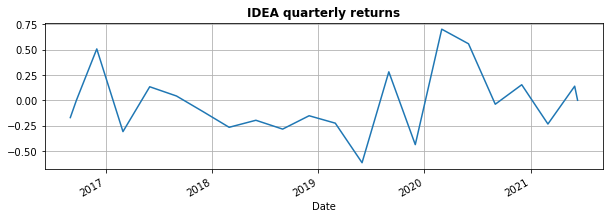

In [258]:
fig24 = plt.figure()
fig24.set_size_inches(10,3)
data24["Adj Close"].pct_change().plot()
plt.title("IDEA quarterly returns", weight="bold");
plt.grid()

In [177]:
returns24=data24["Adj Close"].pct_change().dropna()
mean24 = returns24.mean()
sigma24 = returns24.std()
x24=returns24.quantile(0.05)
x24

-0.43153099204615086

In [178]:
y24=returns24.quantile(0.01)
y24

-0.5789958950641197

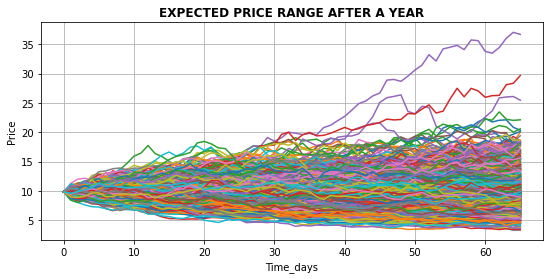

In [181]:
# Monte carlo using the random function with 10000 iterations
days = 66 # weekly
dt = 1/float(days)
sigma = sigma24
mu = mean24
plt.figure(figsize=(9,4))    
for run in range(1000):
    plt.plot(random_walk(9.85))   # Last Traded Price
# If I start from today onwards, the simulation is for next 252 days
plt.xlabel("Time_days")
plt.ylabel("Price");
plt.grid()
plt.title("EXPECTED PRICE RANGE AFTER A YEAR", weight="bold");
# The exceptation is more towards the profit side owing to the positive drift calculated from yearly historical data

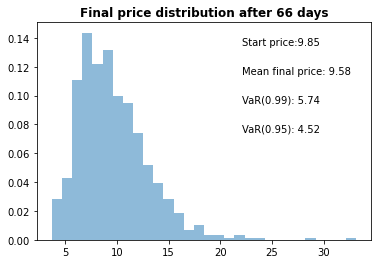

In [182]:
runs = 1000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(9.85)[days-1]
q = np.percentile(simulations, 1)
t = np.percentile(simulations, 5)
plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.5)
plt.figtext(0.6, 0.8, "Start price:9.85")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}".format(9.85 - q))
plt.figtext(0.6, 0.5, "VaR(0.95): {:.3}".format(9.85- t))
plt.title("Final price distribution after {} days".format(days), weight="bold");

In [276]:
data100=yf.download(tickers='IDEA.NS', period='2y', interval='3mo')
data100

[*********************100%***********************]  1 of 1 completed


Open   High   Low  Close  Adj Close       Volume
Date                                                         
2019-06-01  12.10  13.15  4.80   5.35       5.35   5175743799
2019-09-01   5.35   8.15  2.40   6.85       6.85  15939045234
2019-12-01   7.50   8.80  2.80   3.85       3.85  18047081012
2020-03-01   3.90   7.80  2.70   6.55       6.55  22926588725
2020-06-01   6.45  12.60  6.00  10.20      10.20  30042520410
2020-09-01  10.80  13.50  7.60   9.80       9.80  18746114520
2020-12-01   9.80  13.80  8.90  11.30      11.30  18792911676
2021-03-01  11.40  11.65  8.05   8.65       8.65   9493632839
2021-06-01   8.70  10.30  8.45   9.85       9.85   2134557539
2021-06-11  10.00  10.15  9.75   9.85       9.85    161310031

<center>
<html>
  <head>
    <style>
      table,
      th,
      td {
        padding: 10px;
        border: 1px solid black;
        border-collapse: collapse;
      }
    </style>
  </head>
  <body>
      <table style="width:100%">
          <tr>
          <th>TICKER</th>
          <th colspan="2">DAILY VAR(%)(95%,99%)</th>
          <th colspan="2">D Support Levels</th>
          <th colspan="2">D Resistance Levels</th>
          <th colspan="2">WEEKLY VAR(%)</th>
          <th colspan="2">WSL</th>
          <th colspan="2">WRL</th>
          <th colspan="2">MONTHLY VAR(%)</th>
          <th colspan="2">MSL</th>
          <th colspan="2">MRL</th>
          <th colspan="2">QUARTERLY VAR(%)</th>
          <th colspan="2">QSL</th>
          <th colspan="2">QRL</th>
          </tr>
          <tr>
          <td><b>DELTA CORP</b></td>
          <td>2.09</td>
          <td>1.99</td>
          <td>180</td>
          <td>180.19</td>
          <td>187.69</td>
          <td>187.51</td>
          <td>14.87</td>
          <td>10.08</td>
          <td>156.25</td>
          <td>165.05</td>
          <td>210.85</td>
          <td>202.05</td>
          <td>28.82</td>
          <td>22.23</td>
          <td>130.65</td>
          <td>142.75</td>
          <td>236.45</td>
          <td>224.35</td>
          <td>35.9</td>
          <td>28.8</td>
          <td>117.65</td>
          <td>130.95</td>
          <td>249.45</td>
          <td>236.15</td>
          </tr>
          <tr>
          <td><b>SUN TV</b></td>
          <td>1.67</td>
          <td>1.84</td>
          <td>522.58</td>
          <td>521.67</td>
          <td>540.32</td>
          <td>541.23</td>
          <td>10.62</td>
          <td>7.83</td>
          <td>474.65</td>
          <td>489.45</td>
          <td>587.45</td>
          <td>572.65</td>
          <td>20.15</td>
          <td>15.4</td>
          <td>424.05</td>
          <td>449.25</td>
          <td>638.05</td>
          <td>612.85</td>
          <td>26.55</td>
          <td>17.87</td>
          <td>390.05</td>
          <td>436.15</td>
          <td>672.05</td>
          <td>625.95</td>
          </tr>
          <tr>
          <td><b>ITC</b></td>
          <td>0.44</td>
          <td>0.5</td>
          <td>208.38</td>
          <td>208.25</td>
          <td>210.22</td>
          <td>210.35</td>
          <td>7.12</td>
          <td>5.002</td>
          <td>193.1</td>
          <td>197.5</td>
          <td>222.7</td>
          <td>218.3</td>
          <td>13.8</td>
          <td>9.96</td>
          <td>179.2</td>
          <td>187.4</td>
          <td>236.6</td>
          <td>228.4</td>
          <td>20.15</td>
          <td>13.9</td>
          <td>166.0</td>
          <td>179.0</td>
          <td>249.8</td>
          <td>236.8</td>
          </tr>
          <tr>
          <td><b>USL</b></td>
          <td>0.79</td>
          <td>1.07</td>
          <td>639.26</td>
          <td>337.46</td>
          <td>649.44</td>
          <td>651.24</td>
          <td>9.303</td>
          <td>6.67</td>
          <td>585.95</td>
          <td>602.95</td>
          <td>706.15</td>
          <td>689.15</td>
          <td>17.95</td>
          <td>12.46</td>
          <td>530.05</td>
          <td>565.85</td>
          <td>762.05</td>
          <td>726.25</td>
          <td>22.6</td>
          <td>17.34</td>
          <td>500.05</td>
          <td>534.05</td>
          <td>792.05</td>
          <td>758.05</td>
          </tr>
          <tr>
          <td><b>APLLTD</b></td>
          <td>1.8</td>
          <td>2.07</td>
          <td>956.62</td>
          <td>953.99</td>
          <td>991.68</td>
          <td>994.31</td>
          <td>8.26</td>
          <td>6.27</td>
          <td>922.95</td>
          <td>942.95</td>
          <td>1089.15</td>
          <td>1069.15</td>
          <td>16.4</td>
          <td>11.13</td>
          <td>841.05</td>
          <td>894.05</td>
          <td>1171.05</td>
          <td>1118.05</td>
          <td>24.65</td>
          <td>17.39</td>
          <td>758.05</td>
          <td>831.05</td>
          <td>1254.05</td>
          <td>1181.05</td>
          </tr>
          <tr>
          <td><b>IDEA</b></td>
          <td>3.2</td>
          <td>3.84</td>
          <td>9.63</td>
          <td>9.568</td>
          <td>10.27</td>
          <td>10.332</td>
          <td>22.54</td>
          <td>16.65</td>
          <td>7.63</td>
          <td>8.21</td>
          <td>12.07</td>
          <td>11.49</td>
          <td>39.39</td>
          <td>31.27</td>
          <td>5.97</td>
          <td>6.77</td>
          <td>13.73</td>
          <td>12.93</td>
          <td>58.27</td>
          <td>45.89</td>
          <td>4.11</td>
          <td>5.33</td>
          <td>15.59</td>
          <td>14.37</td>
          </tr> 
        </table>
    </body>
</html>
</center>

## <center>  This marks the end of the notebook</center>

<b>References:</b>
[1]. https://financetrain.com/calculating-var-using-monte-carlo-simulation/
[2]. https://risk-engineering.org/VaR/
The notebook uses some content directly from [2] which is distributed under the terms of https://creativecommons.org/licenses/by-sa/4.0/ 